<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/Soluci%C3%B3_anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

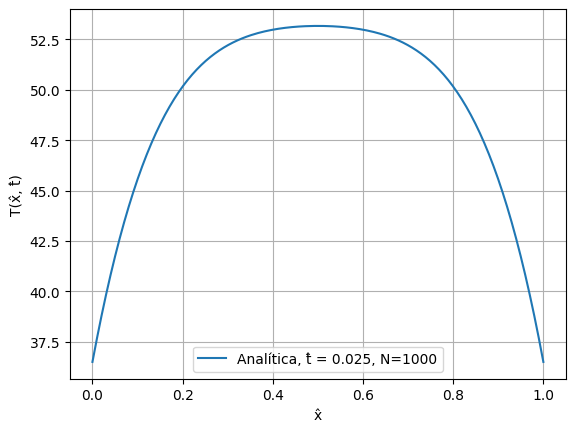

In [49]:
import numpy as np
import matplotlib.pyplot as plt

To = 674.28
Tc = (36.5+273.15)/To
t_hat = 0.025
N = 1000

def T_analytic_adim(x_hat, t_hat, Tc=0.0, N=50):
    x_in = x_hat
    x_hat = np.asarray(x_hat, dtype=float)

    n = np.arange(1, N + 1)
    k = 2*n - 1  # 1,3,5,...

    coeff = 4.0 / (k**3 * np.pi**3) * (1.0 - np.exp(-k**2 * np.pi**2 * t_hat))
    sin_term = np.sin(np.outer(k, np.pi * x_hat))

    T = Tc + np.sum(coeff[:, None] * sin_term, axis=0)

    if np.isscalar(x_in):
        return float(T[0])
    return T

x_vals = np.linspace(0.0, 1.0, 200)   # x adimensional
T_vals = T_analytic_adim(x_vals, t_hat, Tc=Tc, N=N)

T_grausC = T_vals * To - 273.15

# print(T_vals)
plt.plot(x_vals, T_grausC, label=f"Analítica, t̂ = {t_hat}, N={N}")
plt.xlabel("x̂")
plt.ylabel("T(x̂, t̂)")
plt.grid(True)
plt.legend()
plt.show()
